# Lab 8: Define and Solve an ML Problem of Your Choosing

In [11]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [12]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()
list(df.columns)
df.shape

(32561, 15)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set that will be used is the Adult Census Data
2. The label that will be predicted is whether the adult makes above or below 50k
3. This is a supervised, binary classification problem. 
4. The features include all columns which aren't the label column
5. This would be a more basic model that only predicts income on a binary scale (more or less than a threshold), but with higher complexity that includes more income categories, a similar approach could be used to market towards people from different income ranges based on the known demographic or behavioral information. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [13]:
describe_vars = ['age', 'education-num', 'hours-per-week']
df[describe_vars].describe()

,age,education-num,hours-per-week
count,32399.000000,32561.000000,32236.000000
mean,38.589216,10.080679,40.450428
std,13.647862,2.572720,12.353748
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


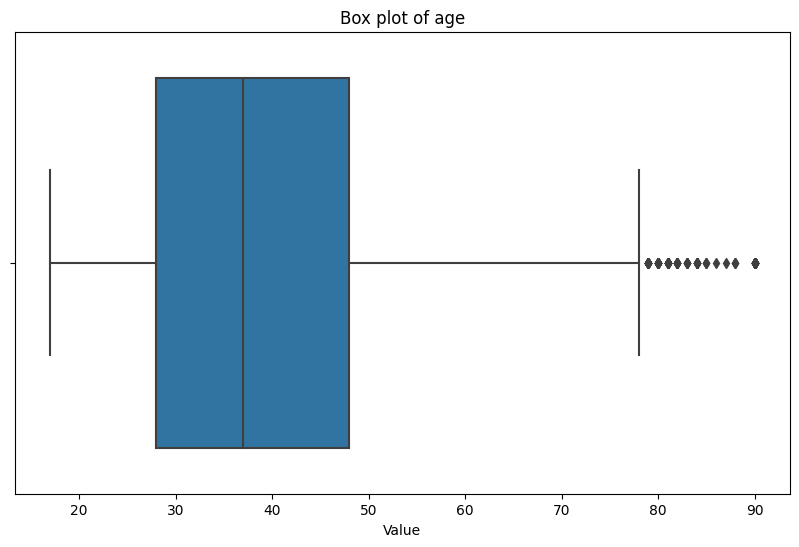

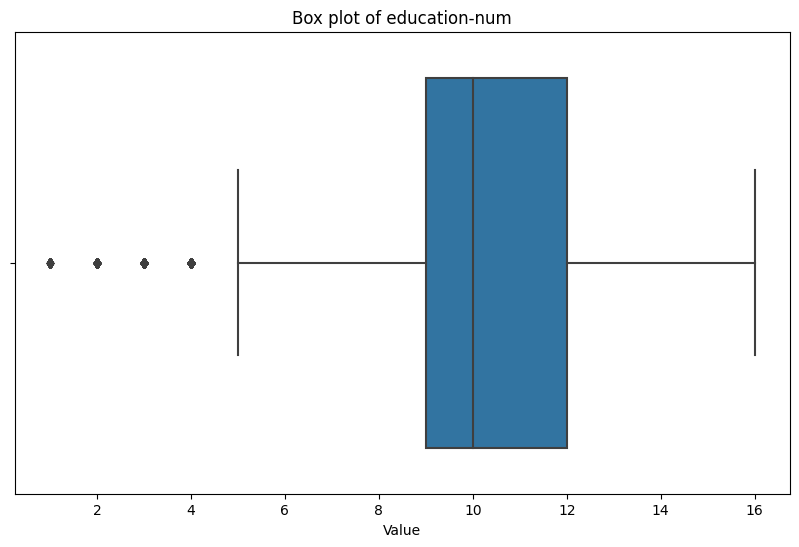

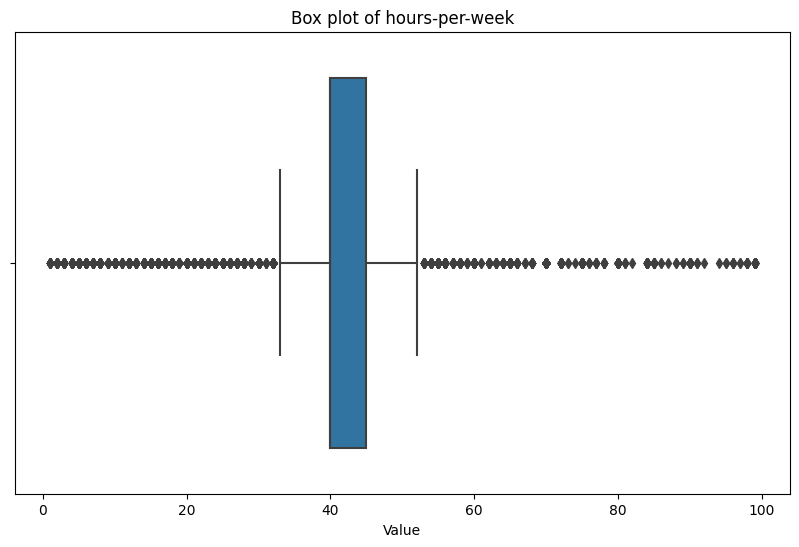

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.xlabel('Value')
plt.title('Box plot of age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['education-num'])
plt.xlabel('Value')
plt.title('Box plot of education-num')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hours-per-week'])
plt.xlabel('Value')
plt.title('Box plot of hours-per-week')
plt.show()

In [15]:
# DROP FEATURES
# drop less relevant features
df = df.drop(columns=['fnlwgt', 'capital-loss', 'education', 'capital-gain', 'relationship'])

# RENAME FEATURES

df = df.rename(columns={'sex_selfID': 'sex'}) # rename self sex ID to sex 

# DEALING WITH MISSING VALUES
# view nan counts 
nan_count = np.sum(df.isnull(), axis=0)
#nan_count

# dropping 'occupation' column entries which are null as they cannot be replaced due to being categorical
df = df.dropna(subset=['occupation'])
np.sum(df.isnull(), axis=0)

# since majority of data is from US, only use entries from US 
len(df[df['native-country'] == 'United-States']) # 27504/32561 entries from US
df = df[df['native-country'] == 'United-States'] 

# drop country column
df=df.drop(columns='native-country')
df.shape


(27504, 9)

In [16]:
# DEAL WITH OUTLIERS, WINSORIZE IF OUTLIERS PRESENT 
# inspect and see if there's outliers for age
z_scores_age = np.abs(stats.zscore(df['age']))
outliers_age = df[z_scores_age > 3 ]
outliers_age # no outliers for age

# inspect and see if there's outliers for education num
z_scores_ed = np.abs(stats.zscore(df['education-num']))
outliers_ed = df[z_scores_ed > 3]
outliers_ed 
# winsorize education num column with 5% threshold 
df['education-num-win'] = stats.mstats.winsorize(df['education-num'], limits = [0.05, 0.05])
df=df.drop(columns='education-num')

# inspect and see if there's outliers for hours per week num
z_scores_hrs = np.abs(stats.zscore(df['hours-per-week']))
outliers_hrs = df[z_scores_hrs > 3]
outliers_hrs # no outliers for hourrs per week 


#replace age and hours per week missing values with median
df['age'] = df['age'].fillna(value=df['age'].mean())
df['hours-per-week'] = df['hours-per-week'].fillna(value=df['hours-per-week'].mean())
np.sum(df.isnull(), axis=0)

age                  0
workclass            0
marital-status       0
occupation           0
race                 0
sex                  0
hours-per-week       0
income_binary        0
education-num-win    0
dtype: int64

In [17]:
# # Second method to calculate Outliers, yields slightly less accurate results than z score outlier calculation 

# def iqr_bounds(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return lower_bound, upper_bound

# # Age column
# age_lower_bound, age_upper_bound = iqr_bounds(df['age'])
# outliers_age = df[(df['age'] < age_lower_bound) | (df['age'] > age_upper_bound)]
# print(len(outliers_age))  # No outliers for age

# df['age'] = stats.mstats.winsorize(df['age'], limits = [0.05, 0.05])
# df['age-win'] = df['age'].astype(float)

# df=df.drop(columns='age')


# # Education-num column
# ed_lower_bound, ed_upper_bound = iqr_bounds(df['education-num'])
# outliers_ed = df[(df['education-num'] < ed_lower_bound) | (df['education-num'] > ed_upper_bound)]
# print(len(outliers_ed))  # Print outliers

# # Winsorize education-num column with IQR bounds

# df['education-num'] = stats.mstats.winsorize(df['education-num'], limits = [0.05, 0.05])
# df['education-num-win'] = df['education-num'].astype(float)
# df=df.drop(columns='education-num')

# # Hours-per-week column
# hrs_lower_bound, hrs_upper_bound = iqr_bounds(df['hours-per-week'])
# outliers_hrs = df[(df['hours-per-week'] < hrs_lower_bound) | (df['hours-per-week'] > hrs_upper_bound)]
# print(len(outliers_hrs))  # No outliers for hours per week

# df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits = [0.05, 0.05])
# df['hours-per-week-win'] = df['hours-per-week'].astype(float)

# df=df.drop(columns='hours-per-week')


In [18]:
# ONE HOT ENCODE CATEGORICAL VARIABLES
df_workclass = pd.get_dummies(df['workclass'], prefix = 'workclass')
df_marital_status = pd.get_dummies(df['marital-status'], prefix = 'marital-status')
df_occupation = pd.get_dummies(df['occupation'], prefix = 'occupation')
df_race = pd.get_dummies(df['race'], prefix = 'race')
df_sex = pd.get_dummies(df['sex'], prefix = 'sex')


In [19]:
# join new encoded dataframes and drop old columns
df_encoded = pd.concat([df_workclass, df_marital_status, df_occupation, df_race, df_sex], axis=1)

df_encoded
print(df.shape)
print(df_encoded.shape)
df = pd.concat([df, df_encoded], axis=1)
df.shape
df = df.drop(columns=['workclass', 'marital-status', 'occupation', 'race', 'sex'])
df.head(10)

(27504, 9)
(27504, 35)


,age,hours-per-week,income_binary,education-num-win,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Non-Female
0,39.0,40.0,<=50K,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,50.0,13.0,<=50K,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,38.0,40.0,<=50K,9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53.0,40.0,<=50K,7,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,37.0,40.0,<=50K,14,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,52.0,45.0,>50K,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
8,31.0,50.0,>50K,14,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,42.0,40.0,>50K,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,37.0,80.0,>50K,10,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12,23.0,30.0,<=50K,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

The new feature list includes age, workclass, marital status, occupation, race, sex, hours per week, and education num. Features that were removed included fnlwgt, capital-loss, education, capital-gain, relationship. Certain features were removed based on intuitive reasoning that they were not significant in relation to the label, the income level (fnlwgt, the amount of people the entry represented, capital-loss, capital-gain. Relationship was excluded because it was very similar to marital status and sex. Education and occupation were removed because they were categorical data, and had many categories which would've made it difficult to one-hot encode. It was also redundant to include the feature when education-num had essentially the same information but in numerical form.

Data preparation techniques included removing irrelevant features, renaming the feature 'sex-self-ID' to 'sex,' inspecting the data for distribution, averages, and outliers, trying out different outlier detection methods, replacing null values with the average, and winsorizing outliers. The project only focuses on US entries, as the majority was in the US with few in the multitude of other countries. 

The model being used is the Decision Tree model due to its handling of feature interaction, and is more intuitive. Since many factors may go into one's income and the data included a total of 38 features, I wanted to investigate which features were most important, and see whether the model would be able to accurately predict on testing data even with many features. I also chose to use decision trees over other models such as logistic regression, as they are non-parametric and don't assume a linear relationship, and also can handle multiple features without having to scale. 

I will be analyzing feature importance through graph visualizations, and using that information to modify the training data as needed. A grid search will be performed to go through various combinatons of the hyperparameters 'max depth' and 'min samples leaf' using cross validation, and the accuracy scores will be graphed while fine tuning the model. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [50]:
# Create labeled examples from the data set
X = df.drop(columns = 'income_binary')
y = df['income_binary']


# See if there's class imbalances 
print(len(y == '<=50K'))
print(len(y == '>=50K'))

# Split the data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

27504
27504


In [51]:
# Verify the shapes of training and test sets 
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(18427, 38)
(9077, 38)
(18427,)
(9077,)


In [59]:
# Create DT model 
md = 20
msl = 100
model = DecisionTreeClassifier(min_samples_leaf = msl, max_depth = md, criterion = 'entropy')

# Fit the model to the training data below
model.fit(X_train, y_train)

# Look at predictions 
class_label_predictions = model.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, class_label_predictions)
print("accuracy with all features: " + str(accuracy))

accuracy with all features: 0.8273658697807645


Text(0, 0.5, 'Normalized importance')

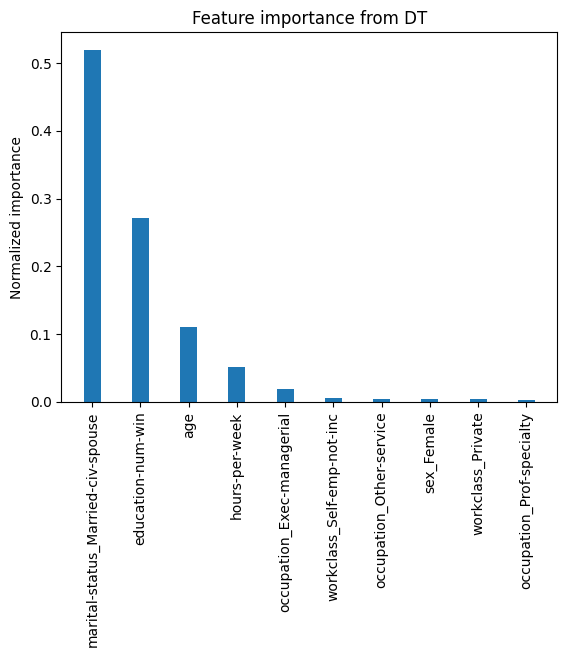

In [53]:
# Repeat this but only for the most significant features 

# Inspect most important features 
fi = model.feature_importances_
fi[:5]

names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]
fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(model.feature_importances_, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')


In [56]:
# Create DT model for only 4 most significant features 

# Find top 4 features and modify training and testing sets 
top4_features = names_sorted[:4]
X_train_top4 = X_train[top4_features]
X_test_top4 = X_test[top4_features]

md = 16
msl = 50
model = model = DecisionTreeClassifier(min_samples_leaf = msl, max_depth = md, criterion = 'entropy')

# Fit the model to the training data below
model.fit(X_train_top4, y_train)

# Look at predictions 
class_label_predictions_4features = model.predict(X_test_top4)

# Compute the accuracy score
accuracy_4_features = accuracy_score(y_test, class_label_predictions_4features)
print("accuracy with 4 features: " + str(accuracy_4_features))

accuracy with 4 features: 0.8200947449597885


accuracy with 1 features: 0.7458411369395175
accuracy with 2 features: 0.810840586096728
accuracy with 3 features: 0.8171201938966619
accuracy with 4 features: 0.8176710366861297
accuracy with 5 features: 0.8245014872755315
accuracy with 6 features: 0.8276963754544453
accuracy with 7 features: 0.8276963754544453
accuracy with 8 features: 0.8276963754544453
accuracy with 9 features: 0.8270353641070839
accuracy with 10 features: 0.8270353641070839
accuracy with 11 features: 0.8270353641070839
accuracy with 12 features: 0.8270353641070839
accuracy with 13 features: 0.8273658697807645
accuracy with 14 features: 0.8273658697807645
accuracy with 15 features: 0.8273658697807645
accuracy with 16 features: 0.8273658697807645
accuracy with 17 features: 0.8273658697807645
accuracy with 18 features: 0.8273658697807645
accuracy with 19 features: 0.8273658697807645
accuracy with 20 features: 0.8273658697807645
accuracy with 21 features: 0.8273658697807645
accuracy with 22 features: 0.827365869780764

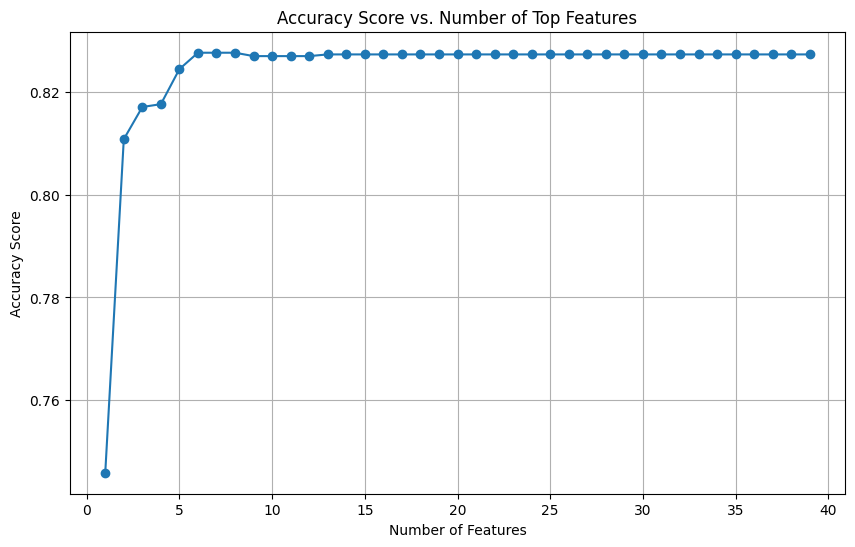

In [57]:
# Loop through different numbers of top amount of features and graph accuracies
accuracy_scores = []

for i in range(1,40):
    top_features = names_sorted[:i]
    X_train_top_features = X_train[top_features]
    X_test_top_features = X_test[top_features]

    md = 20
    msl = 100
    model = DecisionTreeClassifier(min_samples_leaf = msl, max_depth = md, criterion = 'entropy')

    # Fit the model to the training data below
    model.fit(X_train_top_features, y_train)

    # Look at predictions 
    class_label_predictions = model.predict(X_test_top_features)

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, class_label_predictions)
    accuracy_scores.append(accuracy)
    
    print("accuracy with " + str(i) + " features: " + str(accuracy))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Top Features')
plt.grid(True)
plt.show()


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [22]:
# Scan through hyperparameters to find the best ones

hyperparams_depth = [4, 8, 12, 16, 20]
hyperparams_leaf = [25, 50, 75, 100, 125]

param_grid = {'max_depth': hyperparams_depth, 'min_samples_leaf': hyperparams_leaf}
param_grid

model = DecisionTreeClassifier(criterion = 'entropy')
grid = GridSearchCV(model, param_grid, cv = 4)
grid_search = grid.fit(X_train, y_train)
print('Done running grid search')

print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))
print('Best accuracy: {0}'.format(grid_search.best_score_))

Done running grid search
Optimal hyperparameters: {'max_depth': 16, 'min_samples_leaf': 50}
Best accuracy: 0.8222171729648129


In [61]:
# Rerun DT with best parameters

# Create DT model 
md = 16
msl = 50
model = DecisionTreeClassifier(min_samples_leaf = msl, max_depth = md, criterion = 'entropy')

# Fit the model to the training data below
model.fit(X_train, y_train)

# Look at predictions 
class_label_predictions = model.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, class_label_predictions)
print("accuracy with all features: " + str(accuracy))

accuracy with all features: 0.8296794094965297


It appears that the model underfits the data with less than 6 of the most important features. However, the model accuracy peaked at 6 features and beyond, so using anything more than 6 features yielded essentially the same accuracy score with just 6. 

After doing a parameter grid search on the 'min samples leaf' and 'max depth' hyperparameters on a cross fold validation number of 4, the best hyperparameter values were 16 for max depth and 50 for min samples leaf. This yielded a slightly higher accuracy than the max accuracy (0.827--> 0.829 accuracy value). 